In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
    roc_auc_score,
    roc_curve
)
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.densenet import preprocess_input, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import layers, Sequential, Model
from tensorflow.keras.layers import concatenate, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import PIL.Image
from tensorflow.keras import layers, Sequential, Model, Input
from tensorflow.keras.layers import concatenate, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, GlobalAveragePooling1D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping 
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from model import network
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
np.load.__defaults__=(None, False, True, 'ASCII')

print("tensorflow version: {}".format(tf.__version__))

tensorflow version: 2.3.1


## DATA LOAD

In [2]:
raw_path = '/tf/je_hong/datathon/'

In [3]:
# X_train = np.load(raw_path+'X_train.npy', allow_pickle=True)
# X_valid = np.load(raw_path+'X_valid.npy', allow_pickle=True)
train_df = pd.read_csv(raw_path+'train_info.csv')
valid_df = pd.read_csv(raw_path+'valid_info.csv')

In [ ]:
print(X_train.shape, X_valid.shape, len(train_df), len(valid_df))

In [4]:
train_label = train_df['y'].apply(lambda x:1 if x == 'arrhythimia' else 0).tolist()
valid_label =valid_df['y'].apply(lambda x:1 if x == 'arrhythimia' else 0).tolist()
y_train = np.array(train_label)
y_valid = np.array(valid_label)
print('y_train shape: ', y_train.shape, '\ny_valid shape: ', y_valid.shape)

y_train shape:  (38836,) 
y_valid shape:  (4859,)


In [28]:
# print('x train shape: ', X_train.shape, '\nx valid shape: ', X_valid.shape, '\ny train shape: ', y_train.shape, '\ny valid shape: ', y_valid.shape)

x train shape:  (38836, 5000, 12) 
x valid shape:  (4859, 5000, 12) 
y train shape:  (38836,) 
y valid shape:  (4859,)


## DATA NORMALIZATION

In [6]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
# X_valid= scaler.transform(X_valid.reshape(-1, X_valid.shape[-1])).reshape(X_valid.shape)

## SAVING DATA

In [ ]:
# np.save(raw_path+'X_train_nor.npy', X_train)
# np.save(raw_path+'X_valid_nor.npy', X_valid)

## LOAD DATA

In [5]:
X_train = np.load(raw_path+'/X_train_nor.npy')
X_valid = np.load(raw_path+'/X_valid_nor.npy')

In [6]:
print(X_train.shape, X_valid.shape)

(38836, 5000, 12) (4859, 5000, 12)


### NORMALIZATION CHECK

In [7]:
for i in range(len(X_train)):
    print(X_train[i].min(), X_train[i].max())
    print('\n')

-4.103492315969117 4.05768375882211


-5.732500847682975 4.832207572420479


-15.665204262752715 9.103341450910621


-8.311512077332962 10.618450998344336


-10.76343066842765 19.48853893968863


-8.815989752208408 5.7711558354909025


-8.13302440292957 14.886390953393756


-6.070876808199023 15.260984394138688


-7.9102955833692326 7.95777081748513


-4.778358985127951 9.998838440817028


-4.688212286944103 7.31107771797074


-6.658417445321068 6.515838940684687


-9.982769144518993 13.08916008363375


-3.5438574216691823 8.018844539736675


-5.527431961872059 19.960935548164347


-5.298800001067055 3.3754882837831666


-6.56233286817972 10.341296812838168


-5.940677254058617 8.018844539736675


-11.23051181482144 11.375678409361186


-10.000117178383631 9.552893868501632


-5.073275560826776 5.389475365127981


-4.770940651183592 9.04321691390708


-4.331236938137318 4.119901993539469


-11.19975915578555 8.80370698701177


-5.544953124080385 6.859388651716648


-11.095360495774873 

In [8]:
for i in range(len(X_valid)):
    print(X_valid[i].min(), X_valid[i].max())
    print('\n')

-5.281451967202418 5.5395258885245395


-8.193955359926125 9.894230711813032


-6.919414095347762 5.000496500004149


-3.758833562012903 6.54821646699746


-7.085647489124646 5.797392026077171


-9.475633780365989 10.54479878192817


-6.114157592704985 4.986539462224856


-4.866240448471101 4.076446119683479


-5.821486794431061 6.331799595848949


-10.975470229816892 11.178202729724031


-3.9440522850434467 5.5926777586912815


-4.048952808716357 4.767452519794933


-7.763418093521887 7.618639244246048


-8.330304128058026 10.239254466653607


-6.919414095347762 10.854427466596299


-8.575731910695447 10.239254466653607


-8.346195782160358 9.158723211447166


-4.200903325098951 8.253401948691709


-12.544652176926917 11.657752249830297


-4.657443128449745 7.681429887944523


-4.166003080644789 8.567510025598697


-6.971613425353102 7.876142276595748


-7.294053490255584 9.582246302427473


-8.357573881684406 11.890508308605042


-5.4942497509145 5.512135624988717


-3.96714354783721

## TRAIN TEST SPLIT (TEST DATA FOR VALIDATION)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
print('x train shape: ', X_train.shape, '\nx test shape: ', X_test.shape, '\ny train shape: ', y_train.shape, '\ny test shape: ', y_test.shape)

x train shape:  (31068, 5000, 12) 
x test shape:  (7768, 5000, 12) 
y train shape:  (31068,) 
y test shape:  (7768,)


## TRAINING

In [10]:
model_path = raw_path+'{0}/{1}'.format('exp_best_model', 'best_model.h5')
csv_path = raw_path+'{0}/{1}'.format('exp_best_model', 'best_model.csv')
model,history=network(X_train,y_train,X_test,y_test,model_path, csv_path)

Epoch 1/40
971/971 [==============================] - ETA: 0s - loss: 0.5618 - acc: 0.7032
Epoch 00001: val_acc improved from -inf to 0.81231, saving model to /tf/je_hong/datathon/exp_best_model/best_model.h5
971/971 [==============================] - 18s 19ms/step - loss: 0.5618 - acc: 0.7032 - val_loss: 0.4183 - val_acc: 0.8123
Epoch 2/40
968/971 [============================>.] - ETA: 0s - loss: 0.3759 - acc: 0.8306
Epoch 00002: val_acc improved from 0.81231 to 0.84951, saving model to /tf/je_hong/datathon/exp_best_model/best_model.h5
971/971 [==============================] - 15s 15ms/step - loss: 0.3760 - acc: 0.8306 - val_loss: 0.3441 - val_acc: 0.8495
Epoch 3/40
969/971 [============================>.] - ETA: 0s - loss: 0.3125 - acc: 0.8648
Epoch 00003: val_acc improved from 0.84951 to 0.87436, saving model to /tf/je_hong/datathon/exp_best_model/best_model.h5
971/971 [==============================] - 15s 15ms/step - loss: 0.3123 - acc: 0.8649 - val_loss: 0.2923 - val_acc: 0.874

## TRAINING / VALIDATION SCORE 

In [11]:
def acc_plotting(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

In [12]:
def loss_plotting(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

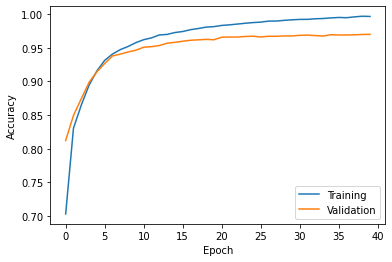

In [13]:
acc_plotting(history)

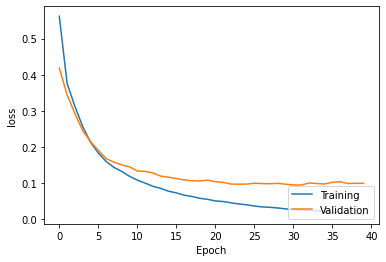

In [14]:
loss_plotting(history)

## WEIGHT SAVE

In [15]:
weights_path = raw_path+'{0}/{1}'.format('exp_best_model', 'best_weights.h5')
model.save_weights(weights_path)